In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Significado de las variables

- D_* = Delinquency variables
- S_* = Spend variables
- P_* = Payment variables
- B_* = Balance variables
- R_* = Risk variables

In [286]:
df = pd.read_csv('data_full.txt', sep='\t')
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,000adf2938f771f75a581b65107024eddeae70684778c0...,2017-04-25,0.885999,0.009377,0.008894,1.006219,0.008716,0.065198,0.001650,0.009946,...,NaN,NaN,0.001505,0.009169,0.009822,NaN,0.004713,0.002896,0.002524,0
1,001a152e1893ab8372e7c9627c9de2e024399f2660d5d8...,2017-11-10,0.750890,0.037378,0.045959,1.001278,0.000312,0.087636,0.004212,0.001730,...,NaN,NaN,0.006351,0.001419,0.004957,NaN,0.001577,0.004017,0.007144,0
2,001e2ceaf1421f1477c0de9ba1c9357b9d278f7b670ab7...,2018-03-26,0.607227,0.002678,0.001271,0.812964,0.005415,NaN,0.005049,0.006548,...,NaN,NaN,0.008643,0.007299,0.000205,NaN,0.006518,0.008823,0.002062,1
3,0034f7e366a41d2500643c7dd0faa6302ce944743ccdf5...,2018-01-07,0.775546,0.003486,0.234352,0.040793,0.256024,0.172966,0.000081,0.225639,...,NaN,NaN,1.002720,0.008143,0.995023,0.626496,1.000037,0.671750,0.188801,0
4,00394e07aa3f71174f8bedfd16d64f194c80ad9445e17f...,2017-04-27,0.358659,0.001814,0.028545,1.004951,0.009079,0.765318,0.003546,0.009843,...,NaN,NaN,0.002115,0.004143,0.007057,NaN,0.004255,0.001370,0.007717,1


---

#### Miremos como está distribuido el DF, para ver cuantas variables categóricas tiene y que otros datos se pueden rescatar.
Buscamos que columnas son categóricas (Object) y procedemos a llenar sus campos faltantes con el dato anterior, según el DF estas deberían de ser:
**['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']**
pero solo dos de ellas no son numéricas, así que las dejaremos igual y solo aplicaremos la transformación a las de tipo objeto
Como las faltantes pertenecen al grupo **D_** procedemos a completarlas con la **moda**.

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6041 entries, 0 to 6040
Columns: 191 entries, customer_ID to target
dtypes: float64(185), int64(2), object(4)
memory usage: 8.8+ MB


In [288]:
column =  df.select_dtypes(include=['object']).columns.to_list()
sub_df = df[column]
print(column)

['customer_ID', 'S_2', 'D_63', 'D_64']


In [289]:
sub_df.isna().sum()

customer_ID      0
S_2              0
D_63             0
D_64           232
dtype: int64

In [290]:
df['D_64'].mode()[0]

'O'

In [291]:
df['D_64'].fillna(df['D_64'].mode()[0], inplace=True)
sub_df = df[column]
sub_df.isna().sum()

customer_ID    0
S_2            0
D_63           0
D_64           0
dtype: int64

---
De las 4 columnas S_2 es una fecha, por lo tanto, no se tiene en cuenta, lo vamos a transformar como tal y customer_ID  es el ID único, en consecuencia tampoco, solo nos queda D_63 y D_64 viendo un poco más su contenido nos queda que son  Categóricas Nominales como resultado utilizaremos One-Hot Encoding para hacer su transformación, renombraremos el D_64-1 por D_64_I por comodidad

In [292]:
df['S_2'] = pd.to_datetime(df['S_2'])

In [293]:
df['D_63'].value_counts()

CO    4496
CR     999
CL     492
XZ      35
XM      12
XL       7
Name: D_63, dtype: int64

In [294]:
df['D_64'].value_counts()

O     3422
U     1694
R      889
-1      36
Name: D_64, dtype: int64

In [295]:
df = pd.get_dummies(df, columns=['D_63', 'D_64'])

In [296]:
df.rename(columns={'D_64_-1': 'D_64_I'}, inplace=True)

In [297]:
df[['D_63_CO', 'D_63_CR', 'D_63_CL', 'D_63_XZ', 'D_63_XZ', 'D_63_XM', 'D_63_XL', 'D_64_O', 'D_64_U', 'D_64_R',
    'D_64_I', 'target']]

,D_63_CO,D_63_CR,D_63_CL,D_63_XZ,D_63_XZ,D_63_XM,D_63_XL,D_64_O,D_64_U,D_64_R,D_64_I,target
0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6036,1,0,0,0,0,0,0,0,1,0,0,0
6037,1,0,0,0,0,0,0,0,1,0,0,1
6038,1,0,0,0,0,0,0,0,0,1,0,1
6039,1,0,0,0,0,0,0,0,1,0,0,0


In [371]:
def completar_na(sub_df):
    for colum in sub_df.columns:
        df[colum].fillna(df[colum].mode()[0], inplace=True)

---
Prosigamos con el resto de categóricas con la **moda**.
**['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_66', 'D_68']** 
Dado que se presentan valores atípicos 

In [298]:
category = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_66', 'D_68']

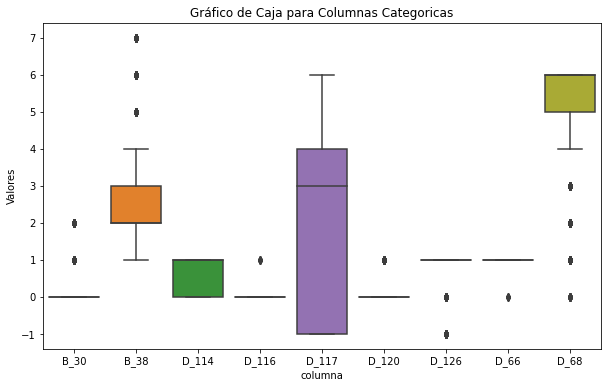

In [301]:
columnas_C = df[category]

plt.figure(figsize=(10, 6))
sns.boxplot(data=columnas_C, orient='v')
plt.title('Gráfico de Caja para Columnas Categoricas')
plt.ylabel('Valores')
plt.xlabel('columna')
plt.show()

In [302]:
sub_df = df[category]
sub_df.isna().sum()

B_30        3
B_38        3
D_114     183
D_116     183
D_117     183
D_120     183
D_126     115
D_66     5383
D_68      228
dtype: int64

In [303]:
completar_na(sub_df)

sub_df = df[category]
sub_df.isna().sum()

B_30     0
B_38     0
D_114    0
D_116    0
D_117    0
D_120    0
D_126    0
D_66     0
D_68     0
dtype: int64

---
Ahora analicemos el resto de los grupos faltantes:

### S_*

In [310]:
columnas_S = df.filter(like='S_').drop('S_2', axis=1)

sub_df = df[columnas_S.columns].loc[:, df[columnas_S.columns].isna().any()]
sub_df.isna().sum()

S_3     1167
S_7     1167
S_9     3226
S_22      28
S_23       1
S_24      27
S_25      16
S_26       1
S_27    1579
dtype: int64

<Figure size 720x432 with 0 Axes>

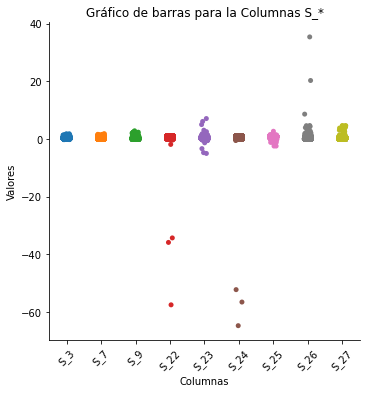

In [356]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

sns.catplot(data = sub_df)
plt.title('Gráfico de barras para la Columnas S_*')
plt.ylabel('Valores')
plt.xlabel('Columnas')
plt.xticks(rotation=45)  # Rota los nombres de las columnas si es necesario
plt.show()

In [361]:
completar_na(sub_df)

### D_*

In [359]:
columnas_D = df.filter(like='D_')

sub_df = df[columnas_D.columns].loc[:, df[columnas_D.columns].isna().any()]
sub_df.isna().sum()

D_41        3
D_42     5164
D_43     1811
D_44      315
D_45        3
         ... 
D_141     103
D_142    5007
D_143     103
D_144      41
D_145     103
Length: 73, dtype: int64

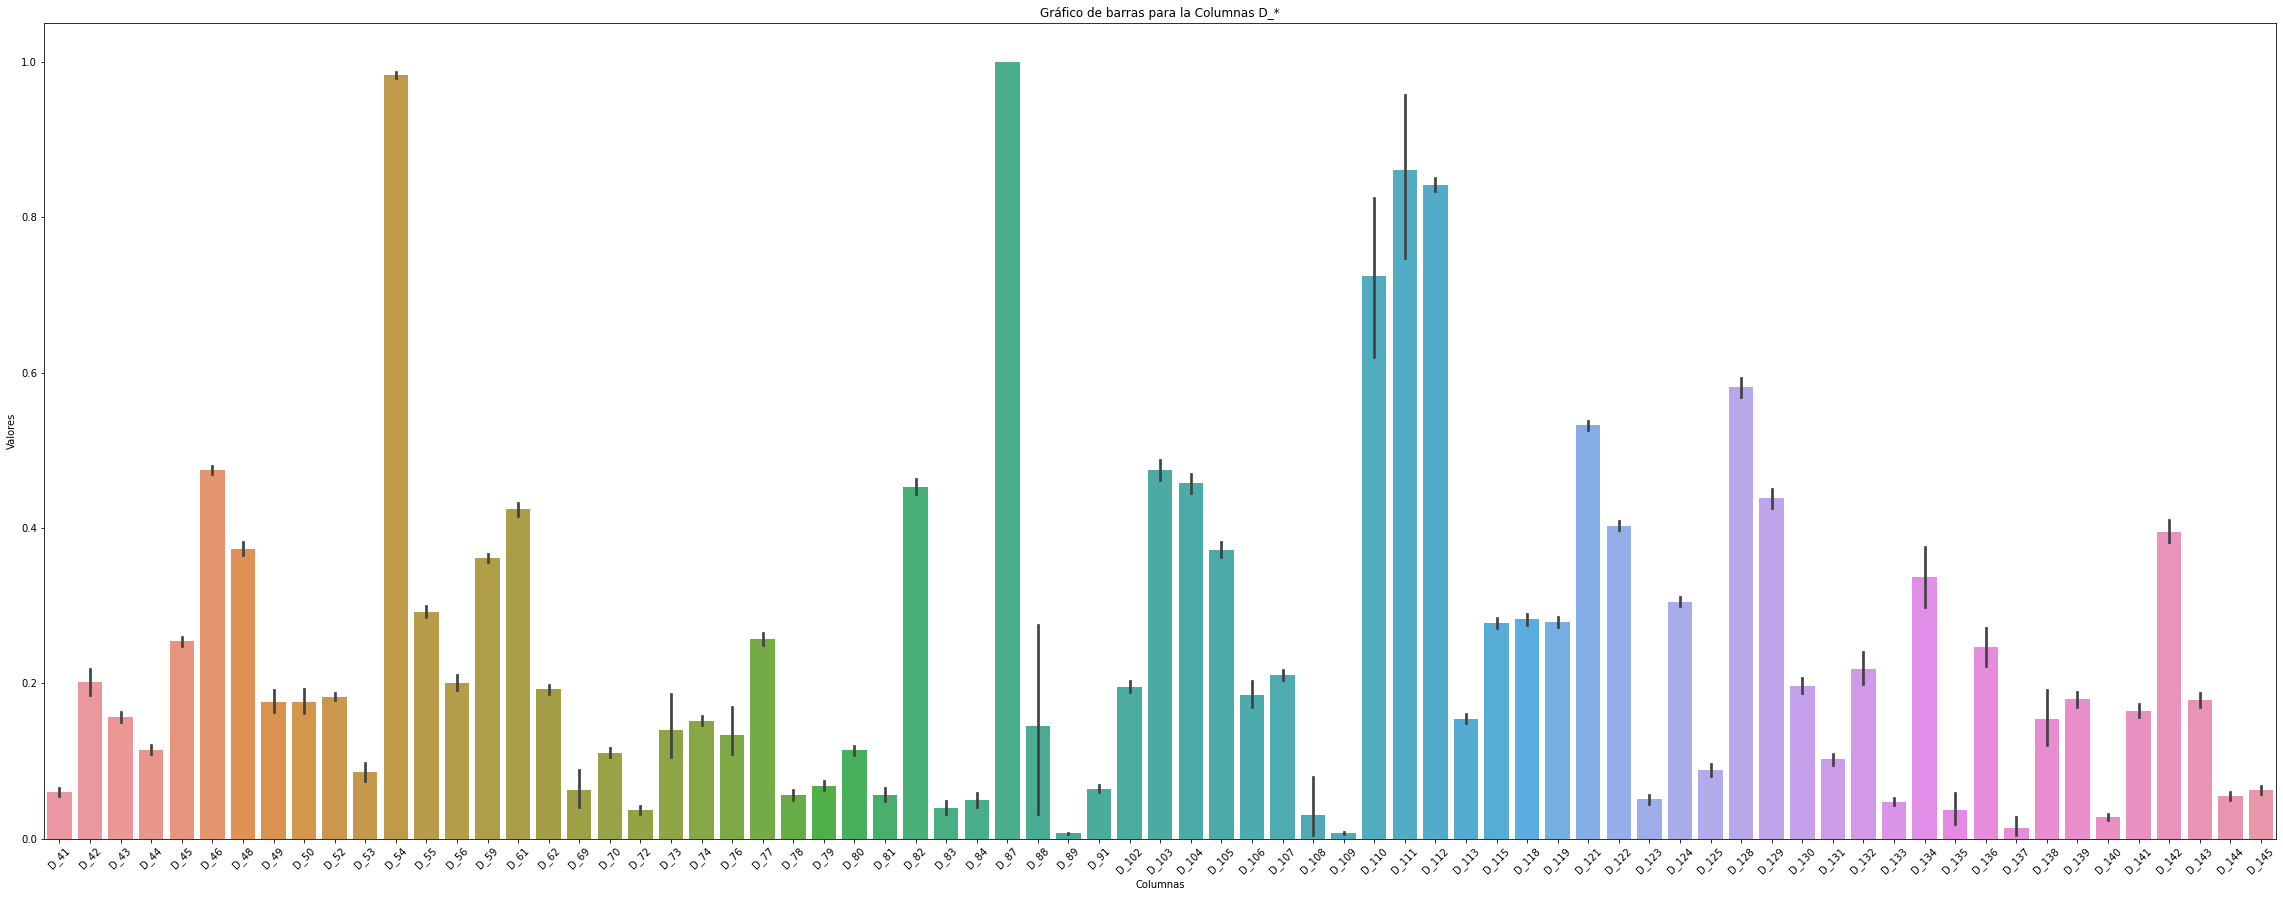

In [360]:
plt.figure(figsize=(40, 15))  # Ajusta el tamaño de la figura
sns.barplot(data = sub_df)
plt.title('Gráfico de barras para la Columnas D_*')
plt.ylabel('Valores')
plt.xlabel('Columnas')
plt.xticks(rotation=45)  # Rota los nombres de las columnas si es necesario
plt.show()

In [362]:
completar_na(sub_df)

### P_*

In [364]:
columnas_P = df.filter(like='P_')

sub_df = df[columnas_P.columns].loc[:, df[columnas_P.columns].isna().any()]
sub_df.isna().sum()

P_2     50
P_3    307
dtype: int64

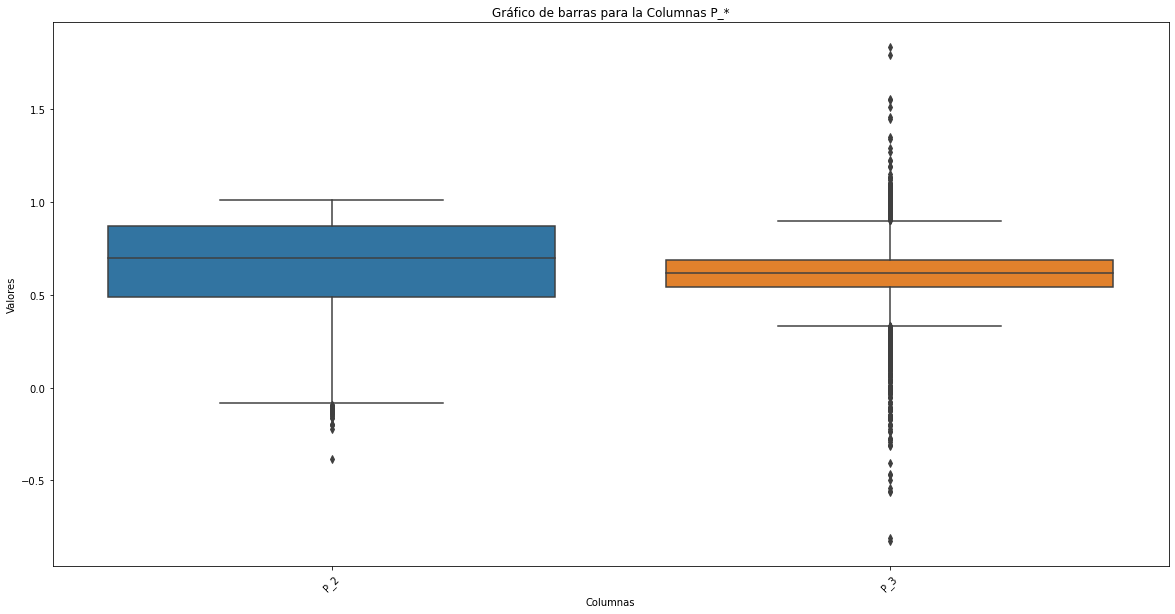

In [369]:
plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura
sns.boxplot(data = sub_df)
plt.title('Gráfico de barras para la Columnas P_*')
plt.ylabel('Valores')
plt.xlabel('Columnas')
plt.xticks(rotation=45)  # Rota los nombres de las columnas si es necesario
plt.show()

In [372]:
completar_na(sub_df)

### B_*

In [373]:
columnas_B = df.filter(like='B_')

sub_df = df[columnas_B.columns].loc[:, df[columnas_B.columns].isna().any()]
sub_df.isna().sum()

B_2        3
B_3        3
B_8       32
B_13      35
B_15      10
B_16       3
B_17    3526
B_19       3
B_20       3
B_22       3
B_25      10
B_26       3
B_27       3
B_29    5623
B_33       3
B_39    6009
B_41       1
B_42    5960
dtype: int64

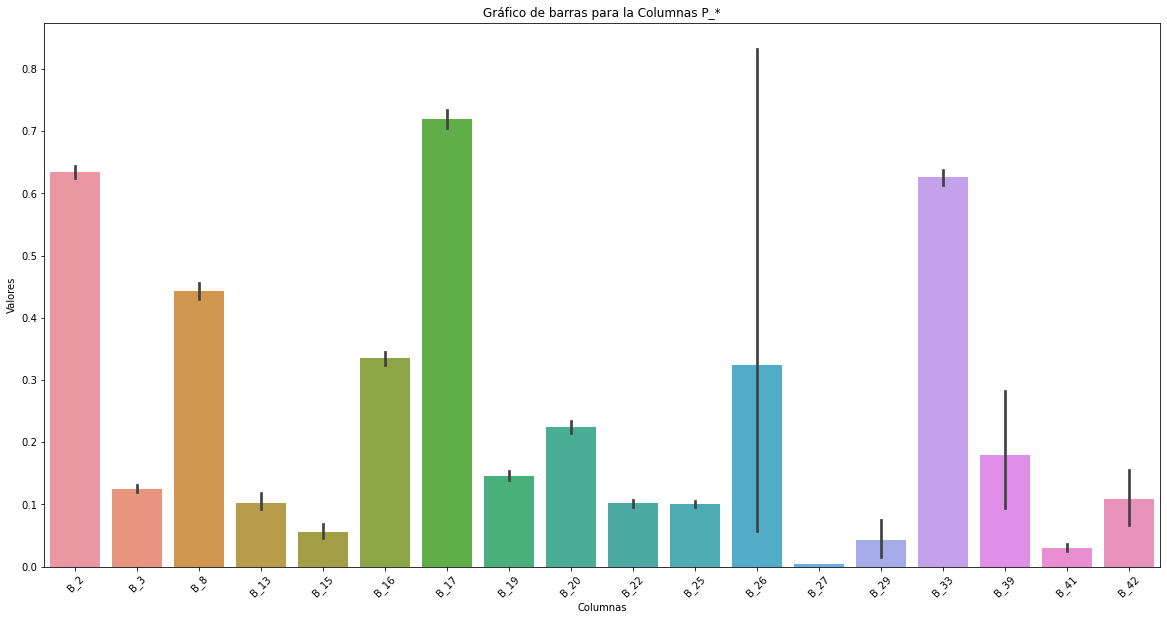

In [376]:
plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura
sns.barplot(data = sub_df)
plt.title('Gráfico de barras para la Columnas B_*')
plt.ylabel('Valores')
plt.xlabel('Columnas')
plt.xticks(rotation=45)  # Rota los nombres de las columnas si es necesario
plt.show()

In [377]:
completar_na(sub_df)

### R_*

In [378]:
columnas_R = df.filter(like='R_')

sub_df = df[columnas_R.columns].loc[:, df[columnas_R.columns].isna().any()]
sub_df.isna().sum()

R_9     5720
R_26    5402
R_27     149
dtype: int64

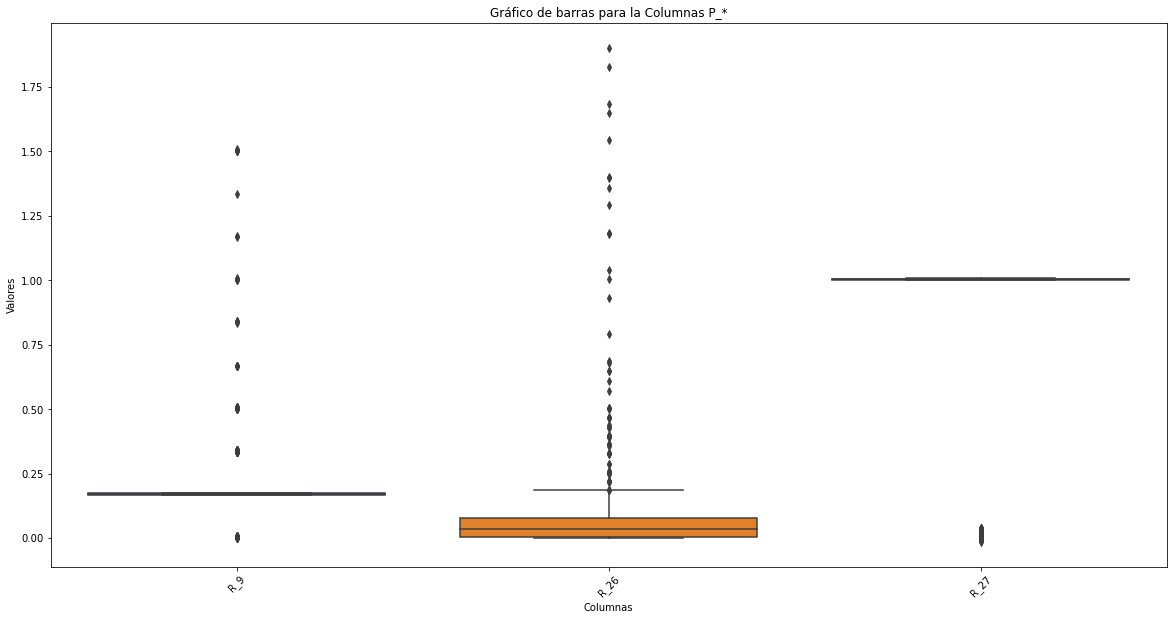

In [381]:
plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura
sns.boxplot(data = sub_df)
plt.title('Gráfico de barras para la Columnas R_*')
plt.ylabel('Valores')
plt.xlabel('Columnas')
plt.xticks(rotation=45)  # Rota los nombres de las columnas si es necesario
plt.show()

In [382]:
completar_na(sub_df)

In [387]:
print(f'Informacion faltate en el DF: {df.isna().sum().sum()}')

Informacion faltate en el DF: 0
